<a href="https://colab.research.google.com/github/jppyykm/Playground/blob/master/Improving_Computer_Vision_Accuracy_using_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutions Variations



We start with a deep neural network. This can serve as our base scenario for comparison.

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [4]:
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.6209 - accuracy: 0.7857
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3929 - accuracy: 0.8587
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3399 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3106 - accuracy: 0.8850
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3462 - accuracy: 0.8754


Now we can try using convolutions to improve it. 

In [5]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [7]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6120 - accuracy: 0.7809
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8864
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2595 - accuracy: 0.9040
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2223 - accuracy: 0.9180
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.9107


We notice the improvement can continue, so we will run it more epochs.

In [8]:
model.fit(training_images, training_labels, epochs=20)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1686 - accuracy: 0.9357
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1463 - accuracy: 0.9455
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1294 - accuracy: 0.9503
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1141 - accuracy: 0.9553
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0984 - accuracy: 0.9622
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9661
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9707
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0696 - accuracy: 0.9732
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9765
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.056

In [9]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


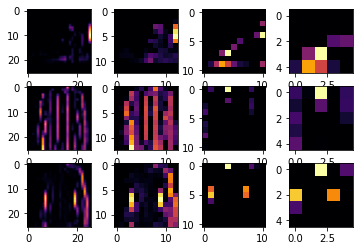

In [10]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Lets adjust the convolution instead of 64 lets try 16

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [12]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6995 - accuracy: 0.7491
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3539 - accuracy: 0.8718
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3056 - accuracy: 0.8886
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2722 - accuracy: 0.9000
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2842 - accuracy: 0.8964


Now lets try 32

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [14]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6497 - accuracy: 0.7624
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8779
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.8960
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9078
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.8999


Lets try 120 pooling layers


In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(120, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(120, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 120)       1200      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 120)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 120)       129720    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 120)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               384128    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [16]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5738 - accuracy: 0.7907
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.8923
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2400 - accuracy: 0.9106
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2000 - accuracy: 0.9268
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2631 - accuracy: 0.9093


With these examples we see little difference in the amount of pooling layers. /

Let's try removing the last pooling layer. 

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(120, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(120, (3,3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 120)       1200      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 120)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 120)       129720    
_________________________________________________________________
flatten_6 (Flatten)          (None, 14520)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1858688   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 1,990,898
Trainable params: 1,990,898
Non-trainable params: 0
____________________________________________

In [18]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5205 - accuracy: 0.8152
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2520 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1904 - accuracy: 0.9294
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1449 - accuracy: 0.9451
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2533 - accuracy: 0.9190


Interestingly the accuracy went up by a point. 

Let's add  more pooling layers.
*italicized text*

In [21]:
  model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(120, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(120, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(120, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 120)       1200      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 120)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 120)       129720    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 120)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 120)         129720    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 120)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 120)              

In [22]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7256 - accuracy: 0.7292
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3782 - accuracy: 0.8614
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3003 - accuracy: 0.8891
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2683 - accuracy: 0.9003
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3051 - accuracy: 0.8897
